In [5]:
# a) Lägg till datasetet till .gitignore
with open('.gitignore', 'a') as f:
    f.write('\n# Ignore Dogs vs Cats dataset\n')
    f.write('data/dogs-vs-cats\n')

# 0. EDA och filhantering (*)

a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder,
 glöm inte att lägga till den till .gitignore.
 
 b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.



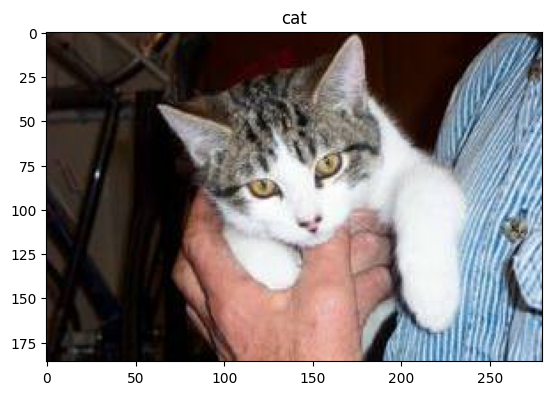

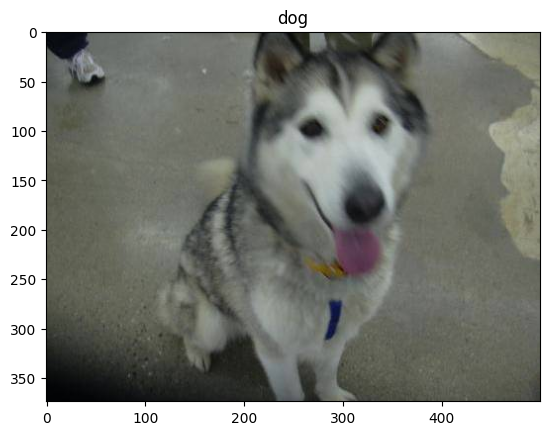

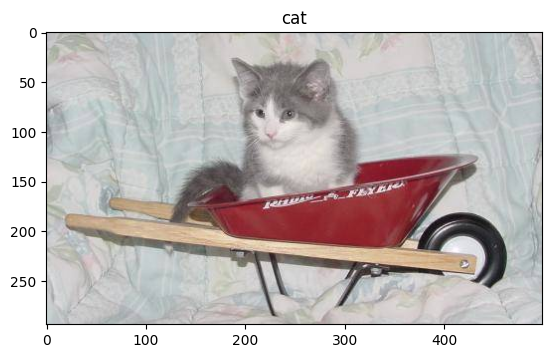

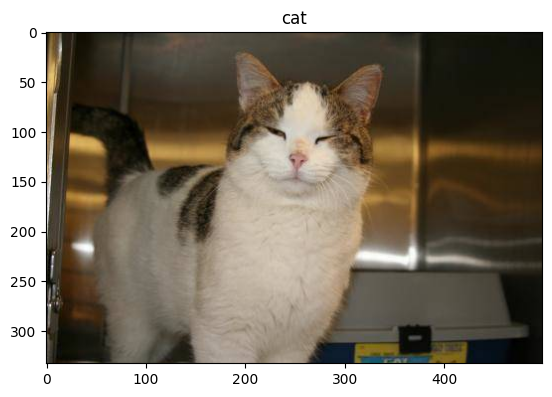

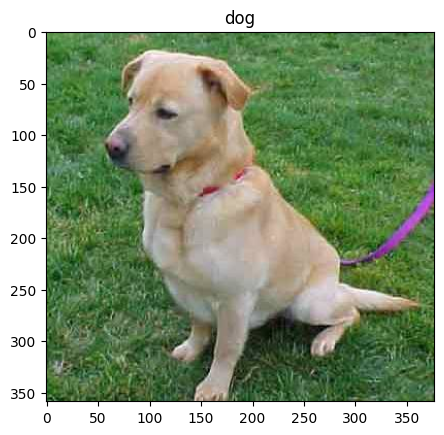

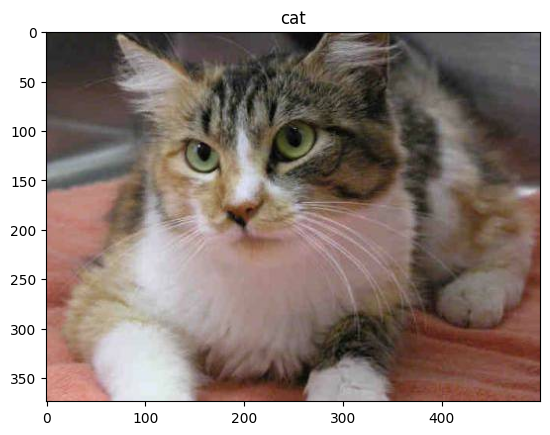

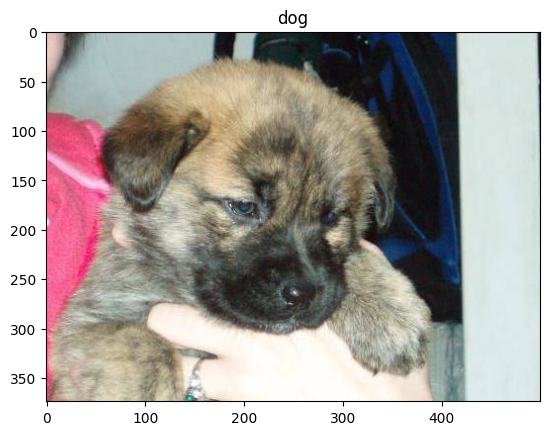

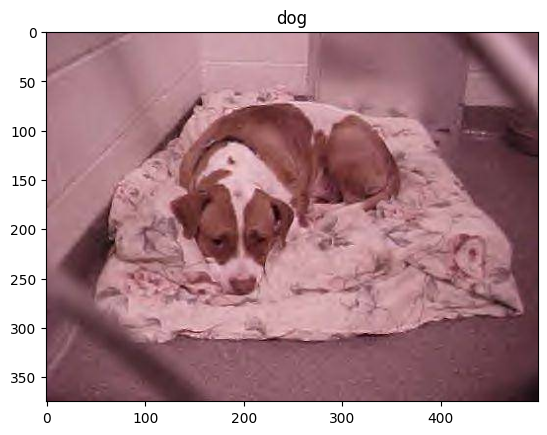

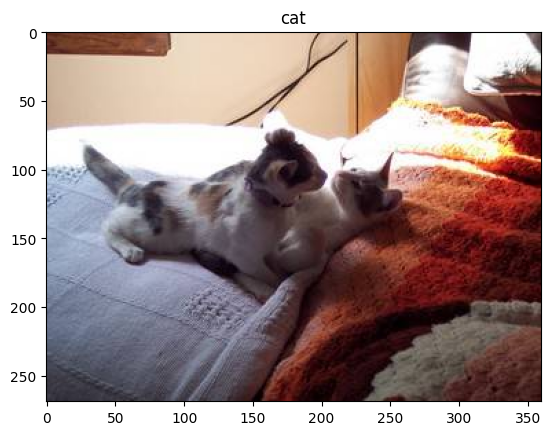

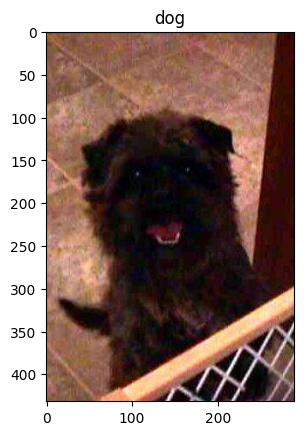

In [6]:

import os
import random
from PIL import Image
import matplotlib.pyplot as plt


data_dir = 'data/train/train'
images = os.listdir(data_dir)
random_images = random.sample(images, 10)

for img_name in random_images:
    img_path = os.path.join(data_dir, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(img_name.split('.')[0])  # Extrahera etiketten från filnamnet
    plt.show()

In [8]:
# Set the directory path where the images are stored.
source_dir = "original_data/train/train"
import os

base_dir = 'Labb_2'

subdirs = [
    'experiment_small_data/train', 'experiment_small_data/val', 'experiment_small_data/test',
    'experiment_tiny_data/train', 'experiment_tiny_data/val', 'experiment_tiny_data/test',
    'original_data/train', 'original_data/test'
]

for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

In [10]:
import shutil
from sklearn.model_selection import train_test_split

# Skapa split för experiment_small
train_val_data, test_data = train_test_split(images, test_size=500, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=400, random_state=42)

# Flytta filerna till respektive mappar
for img_name in train_data:
    shutil.move(os.path.join(data_dir, img_name), os.path.join(base_dir, 'experiment_small_data/train', img_name))
# Gör liknande för val_data och test_data


c) Skapa folderstrukturen nedan med Python:

In [12]:
import os

base_dir = 'data'

subdirs = [
    'experiment_small_data/train', 'experiment_small_data/val', 'experiment_small_data/test',
    'experiment_tiny_data/train', 'experiment_tiny_data/val', 'experiment_tiny_data/test',
    'original_data/train', 'original_data/test'
]

for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)


d) Nu ska du göra train|val|test split med följande splits:

In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Assuming images is a list of image filenames
num_images = len(images)

# Use 20% of the data for testing
test_size = 0.2
train_val_data, test_data = train_test_split(images, test_size=test_size, random_state=42)

# Use 20% of the remaining data for validation
val_size = 0.2
for img_name in test_data:
    src = os.path.join(data_dir, img_name)
    dst = os.path.join(base_dir, 'experiment_small_data/test', img_name)
    if os.path.exists(src):
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.move(src, dst)
        print(f"Moving {src} to {dst}")
    else:
        print(f"Source file {src} does not exist.")


Source file data/train/train\cat.493.jpg does not exist.
Source file data/train/train\dog.9112.jpg does not exist.
Source file data/train/train\cat.745.jpg does not exist.
Source file data/train/train\dog.11022.jpg does not exist.
Source file data/train/train\dog.11363.jpg does not exist.
Source file data/train/train\cat.5488.jpg does not exist.
Source file data/train/train\cat.3972.jpg does not exist.
Source file data/train/train\dog.10365.jpg does not exist.
Source file data/train/train\cat.1796.jpg does not exist.
Source file data/train/train\cat.7359.jpg does not exist.
Source file data/train/train\dog.678.jpg does not exist.
Source file data/train/train\cat.1900.jpg does not exist.
Source file data/train/train\cat.474.jpg does not exist.
Source file data/train/train\dog.4771.jpg does not exist.
Source file data/train/train\cat.12263.jpg does not exist.
Source file data/train/train\dog.10772.jpg does not exist.
Source file data/train/train\dog.652.jpg does not exist.
Source file da

) Läs in dataset och one-hot encode labels

Använd tensorflow eller keras för att skapa one-hot encoded labels.

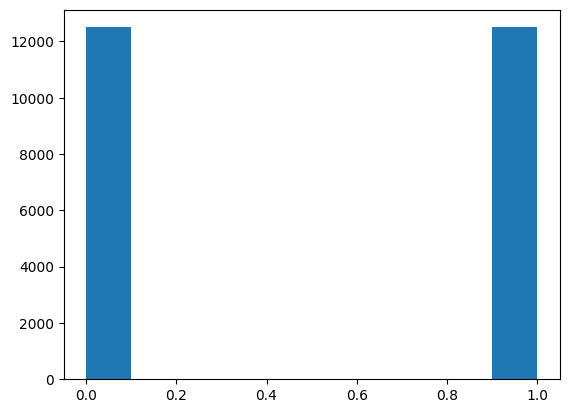

In [20]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Labels till 0 för hundar och 1 för katter
labels = np.array([0 if 'dog' in name else 1 for name in images])
one_hot_labels = to_categorical(labels)

# Kontrollera att dataset är balanserat
plt.hist(labels)
plt.show()

 Bildbehandling

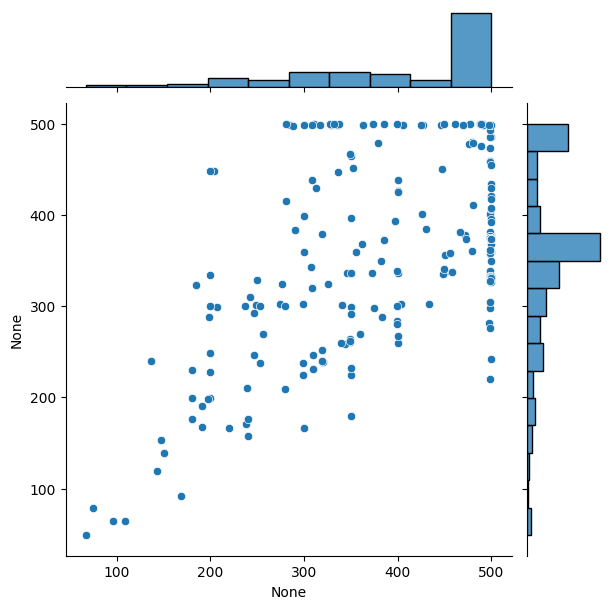

In [27]:
import seaborn as sns
img_sizes = [Image.open(os.path.join(data_dir, img)).size for img in train_data if os.path.exists(os.path.join(data_dir, img))]
widths, heights = zip(*img_sizes)

sns.jointplot(x=widths, y=heights, kind='scatter')
plt.show()

1B välj en bildstorlek som passar för ditt experiment. Skriv en kort motivering för ditt val.

224x224 fungerar för de flesta deeplearningmodeller.

In [29]:
resized_images = np.array([np.array(Image.open(os.path.join(data_dir, img)).resize((224, 224))) for img in train_data if os.path.exists(os.path.join(data_dir, img))])



d) Augmentera data

Jag använder ImageDataGenerator från keras för att augmentera bilderna.

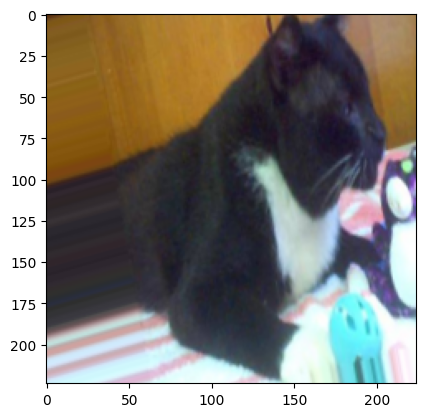

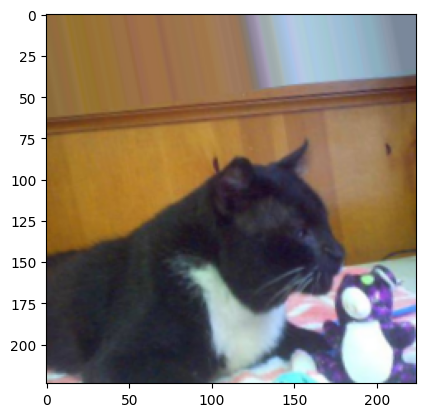

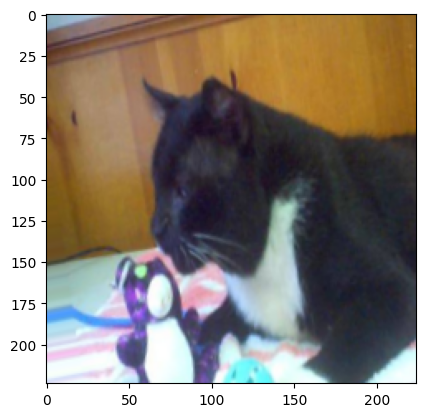

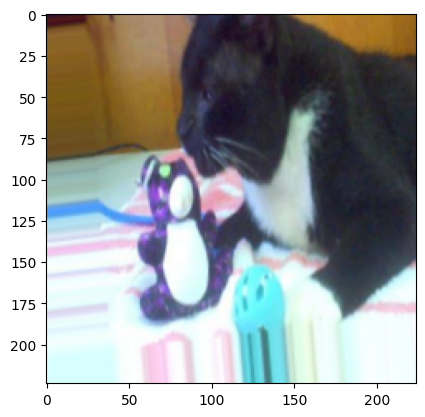

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Skapa en ImageDataGenerator med augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Använd generatorn för att augmentera bilderna
# Antag att `resized_images` är en numpy array med bilder i form av (samples, rows, cols, channels)
# För att augmentera bilderna och visa några exempel:
sample_image = resized_images[0]  # Ta en bild som exempel
sample_image = sample_image.reshape((1,) + sample_image.shape)  # Reshape för att passa till generatorn

i = 0
for batch in datagen.flow(sample_image, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:  # Visa fyra augmenterade versioner av bilden
        break
plt.show()
